In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [12]:
df_conversion_rate = pd.read_csv('/content/drive/MyDrive/Prueba técnica/Rocketla/Base_Conversion_worked.csv')

In [ ]:
%pip install sweetviz
import sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 54.5 MB/s eta 0:00:00


In [ ]:
df_conversion_rate.head(3)

,amplitude_id,user_id,city,device,os,platform,region,gp:BCS,gp:Birthday,gp:Delinquency amount,gp:Nip Verify,gp:Number of Revolving credits,gp:Number of no revolving credits,gp:Total Credit Line,gp:Total current debt,gp:utm_source
0,4.114080e+11,NaN,Reynosa,Android,Chrome Mobile 102,Web,Tamaulipas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adwords
1,4.116090e+11,83a19c9c-6122-4fc2-ae05-b99d6a33a4be,Naucalpan,Android,Chrome Mobile 102,Web,México,657.0,1991-12-11,0.0,VERDADERO,0.0,0.0,NaN,0.0,adwords
2,4.124610e+11,NaN,Tuxtla Gutiérrez,Android,Chrome Mobile 102,Web,Chiapas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adwords


In [ ]:
report_rocketla = sweetviz.analyze(df_conversion_rate)

                                             |          | [  0%]   00:00 -> (? left)


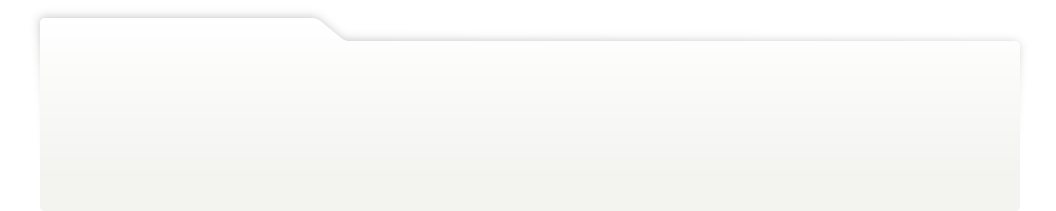
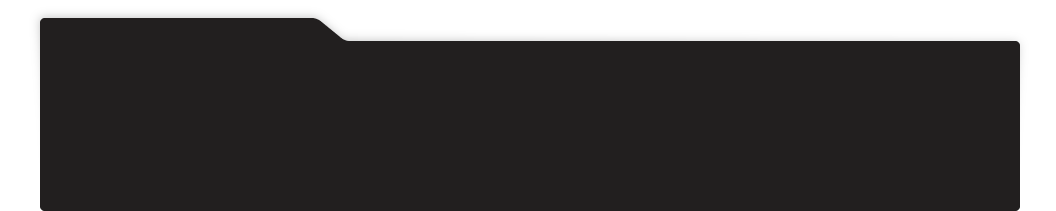
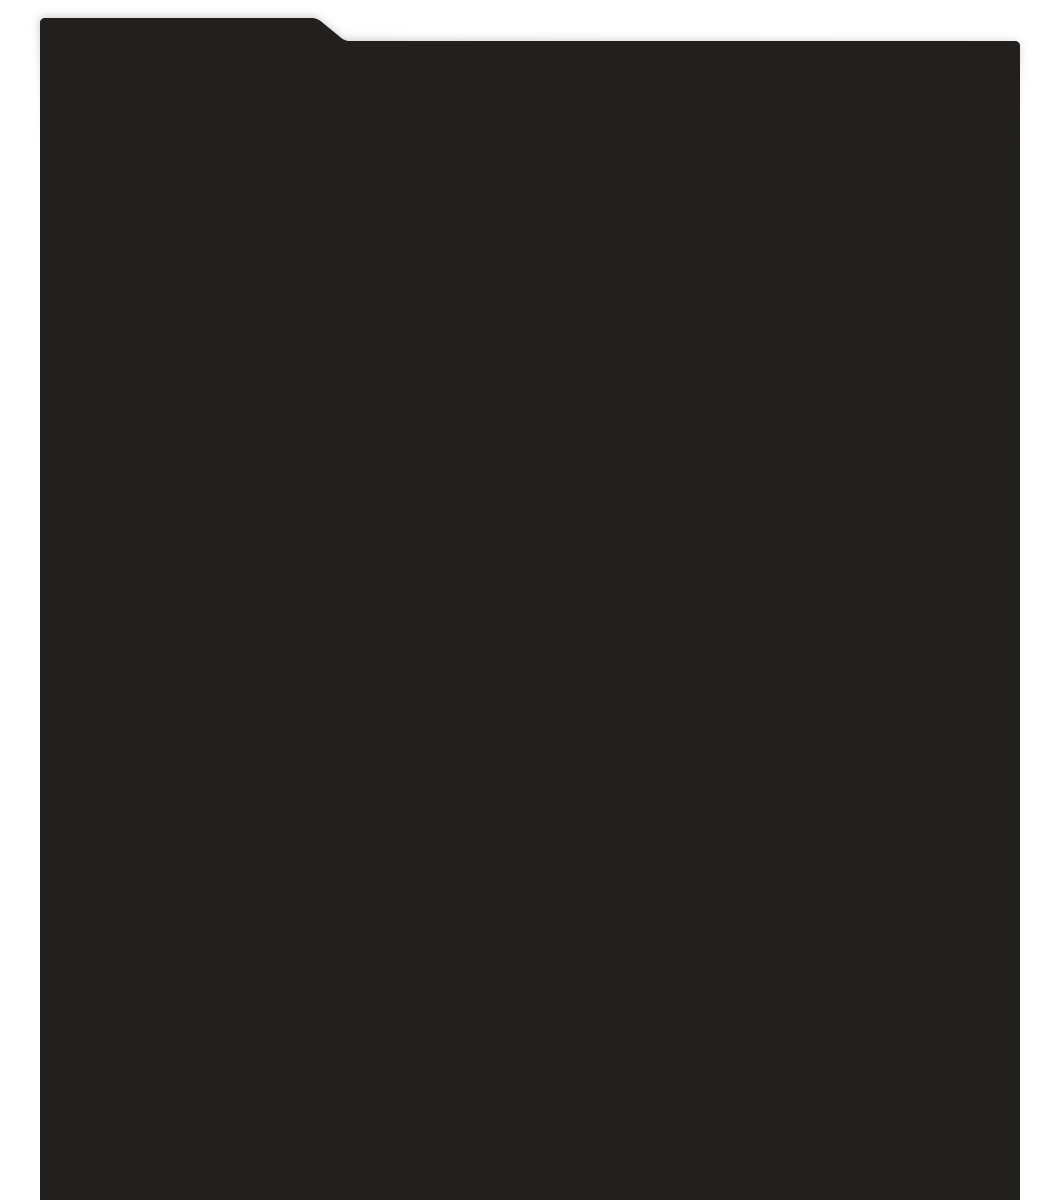
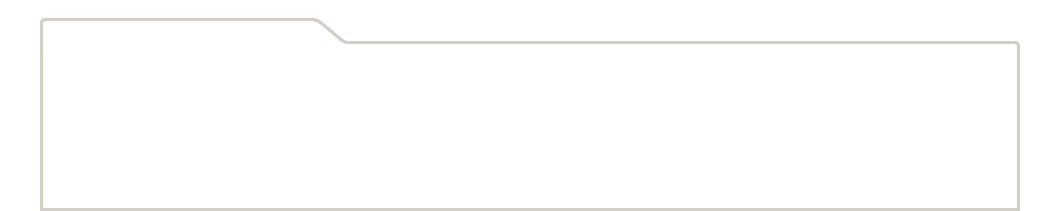
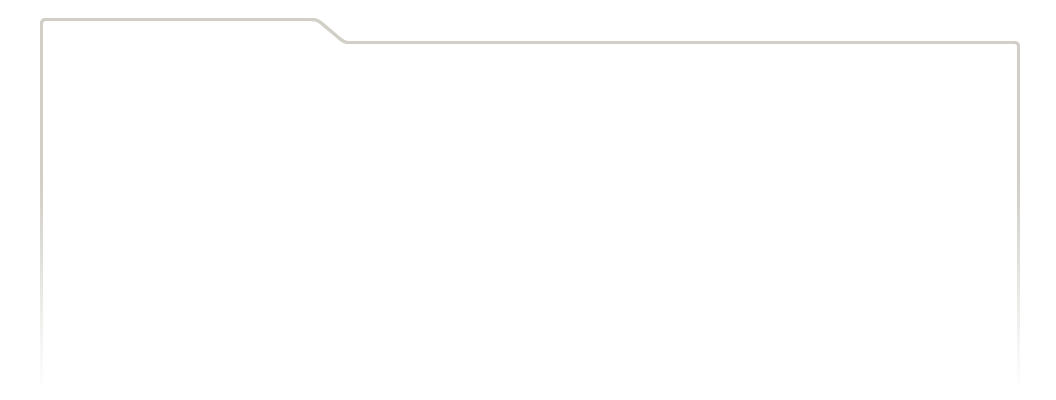
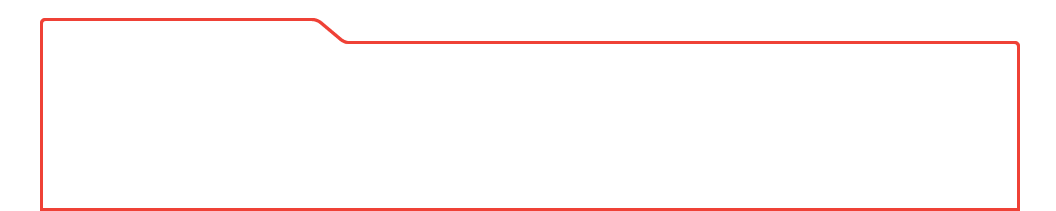
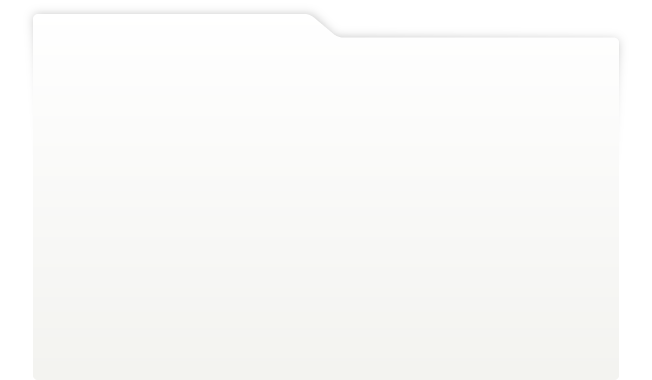
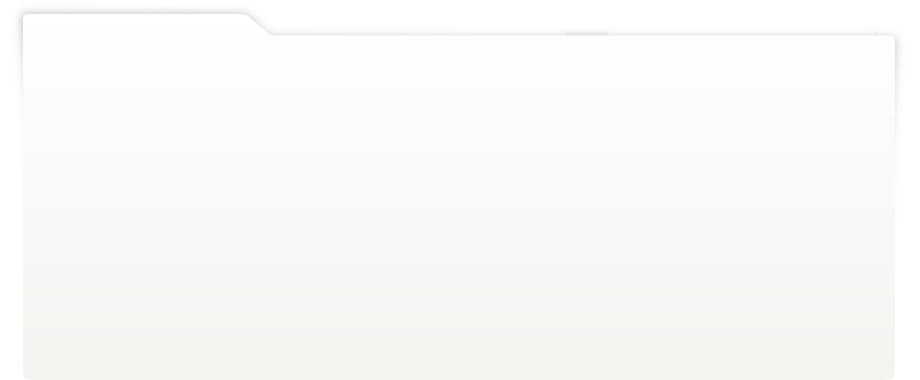
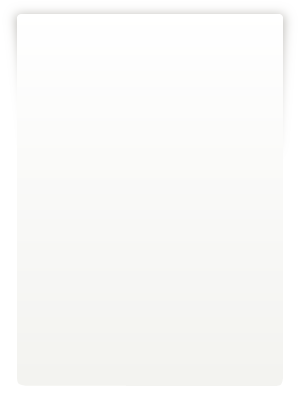
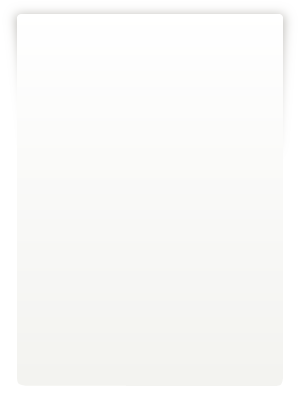
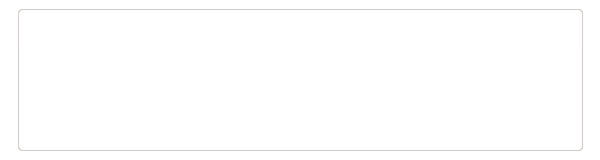
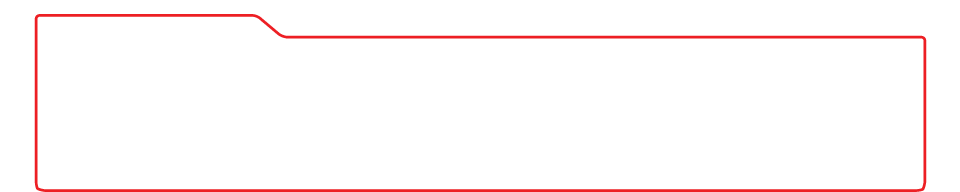
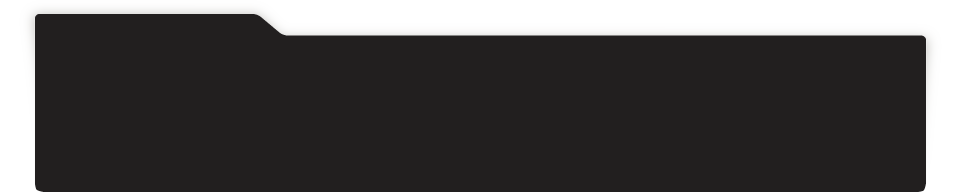
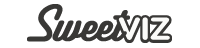
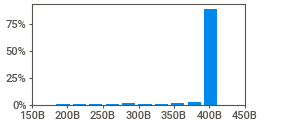
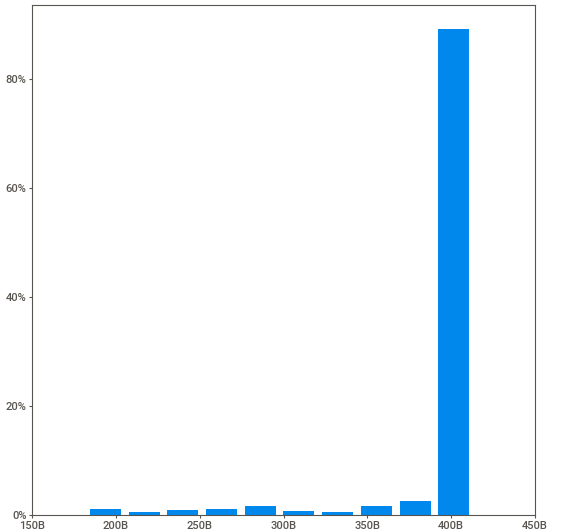
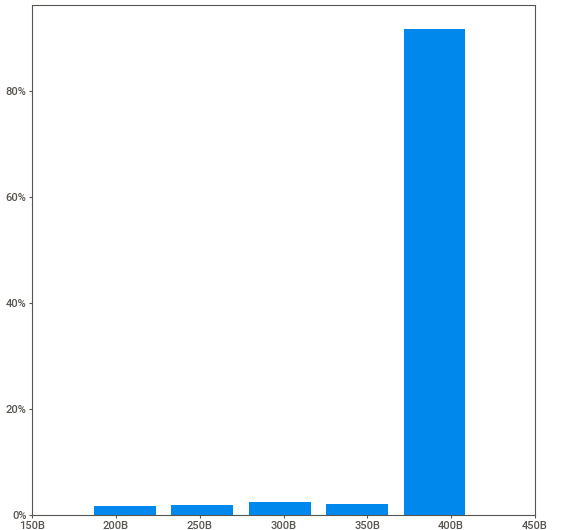
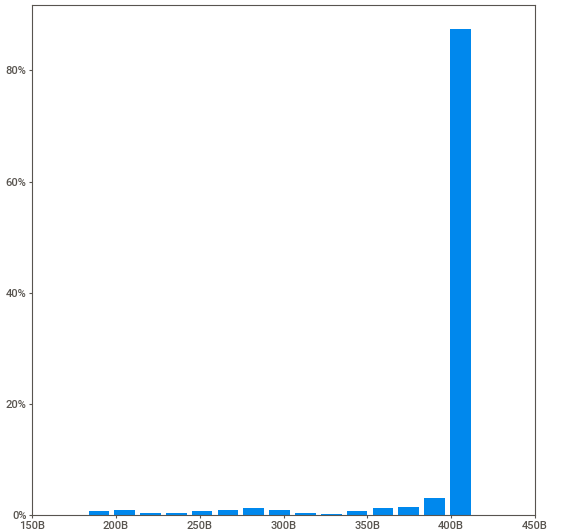
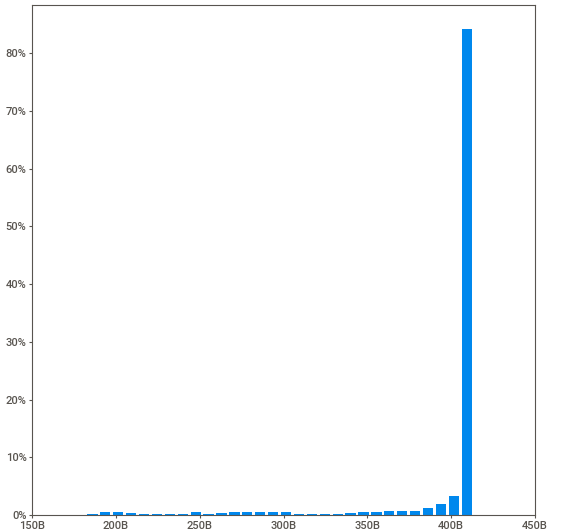
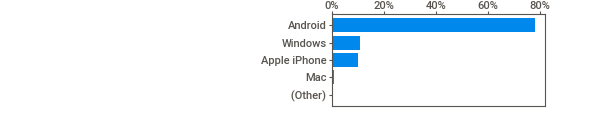
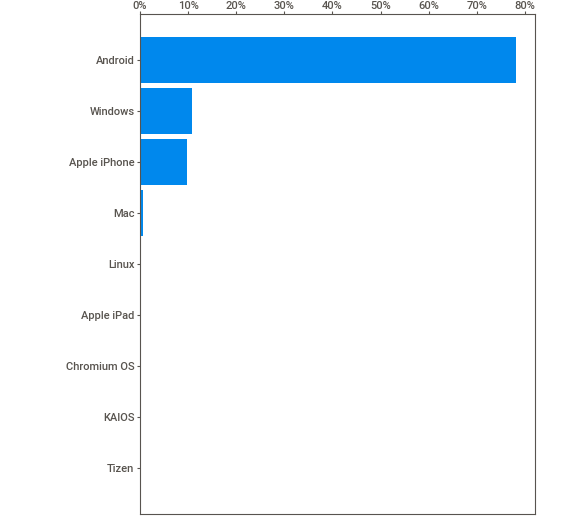
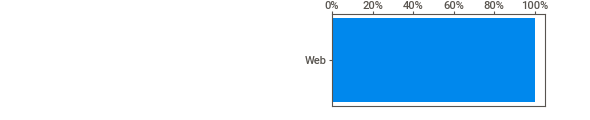
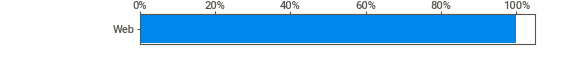
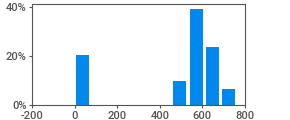
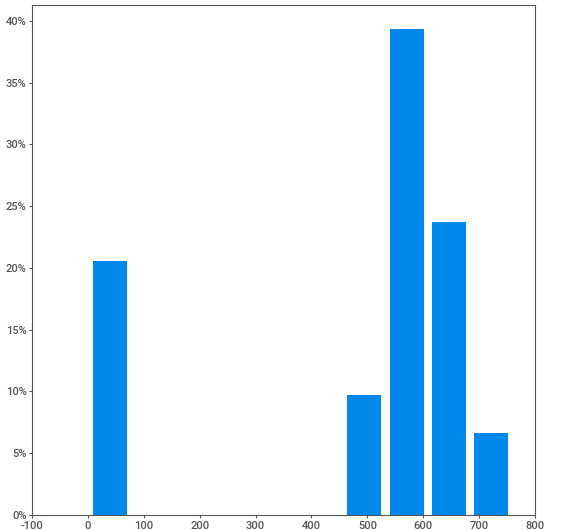
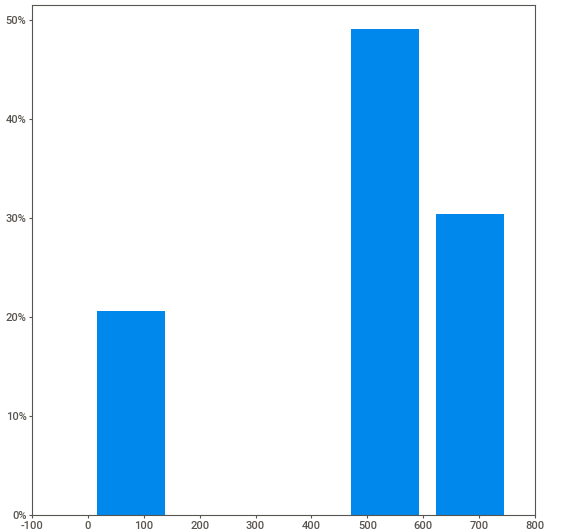
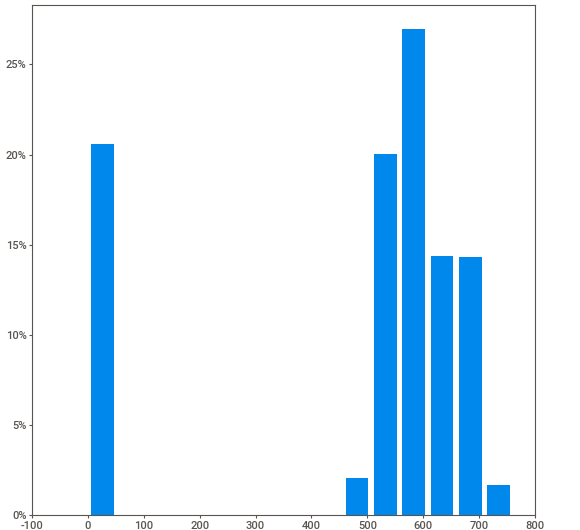
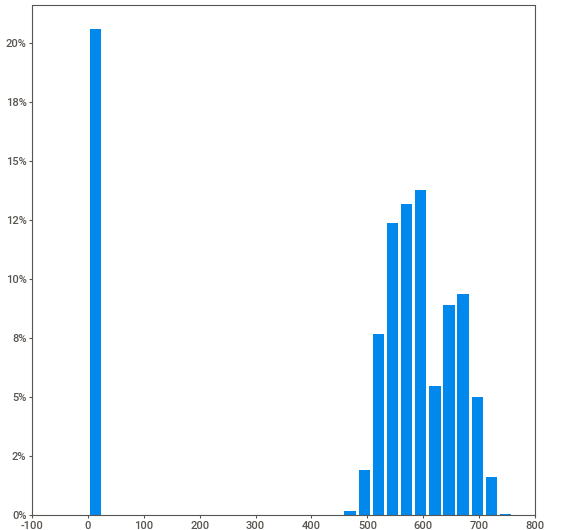
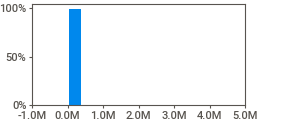
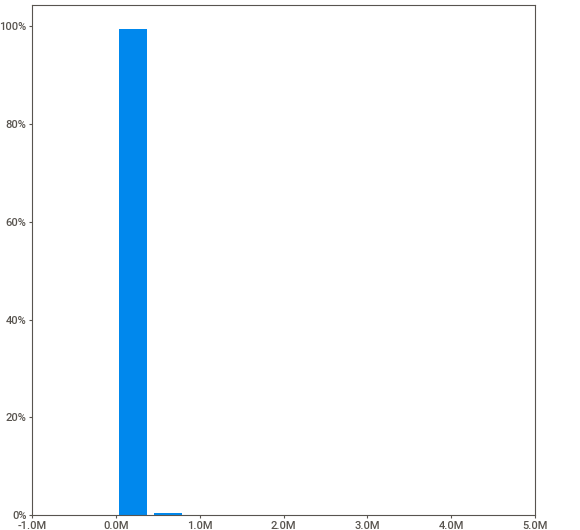
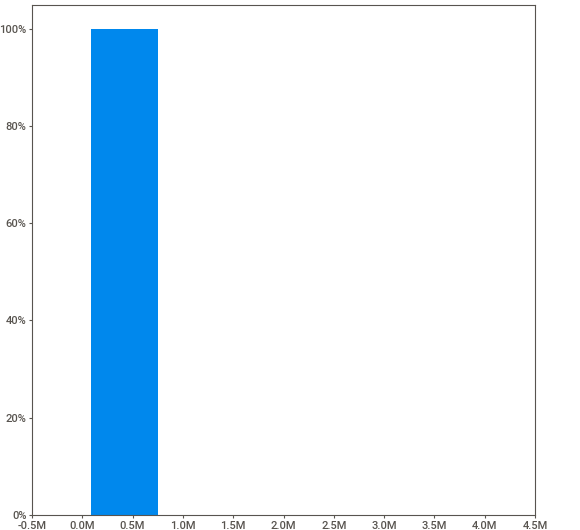
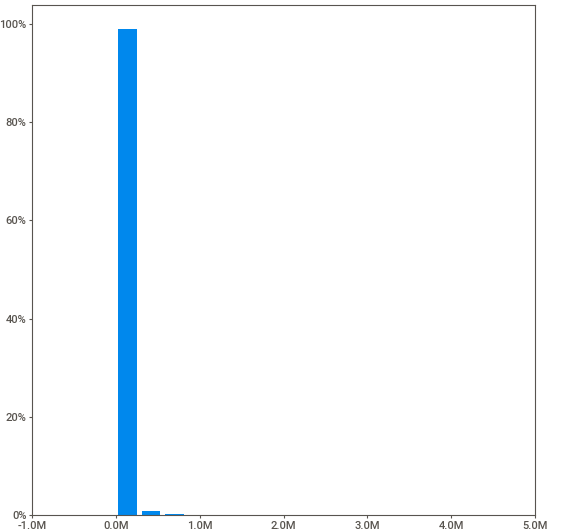
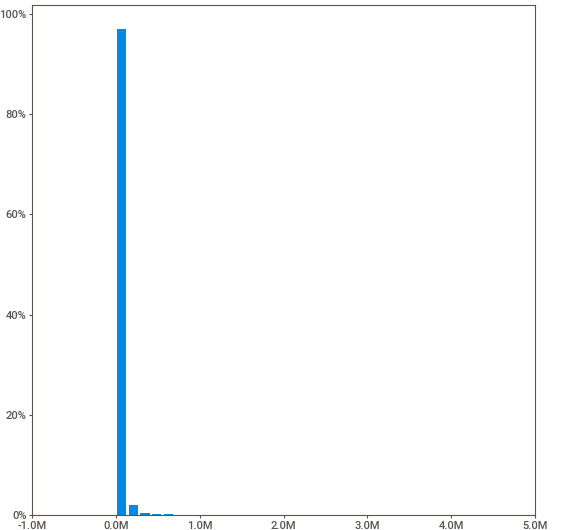
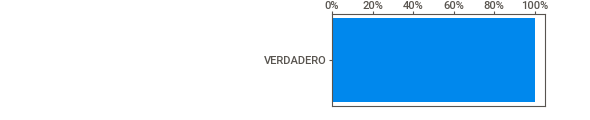
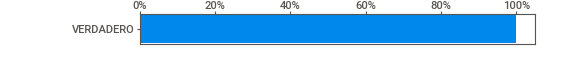
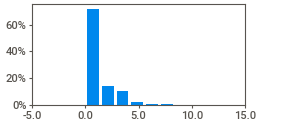
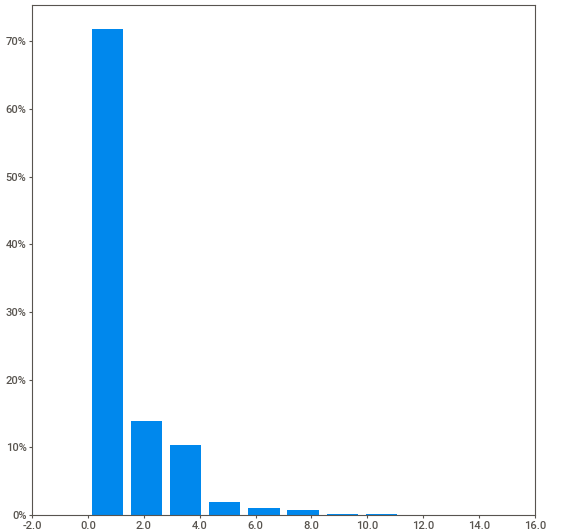
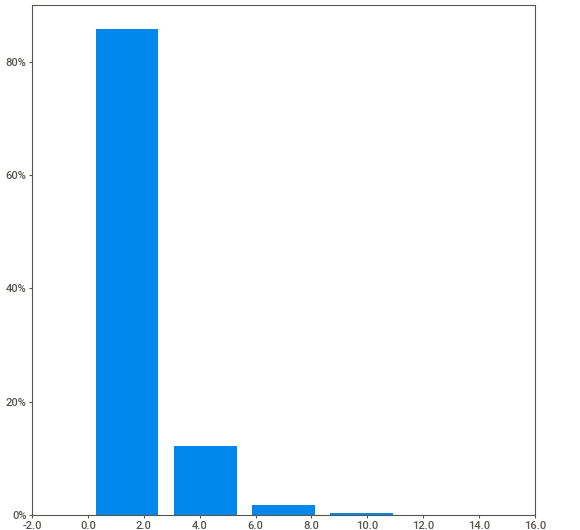
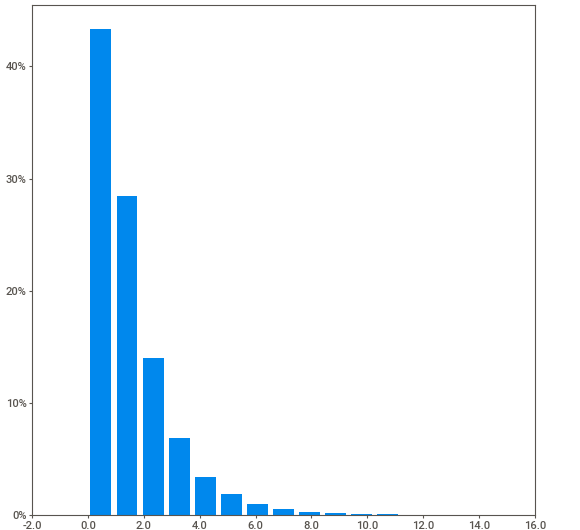
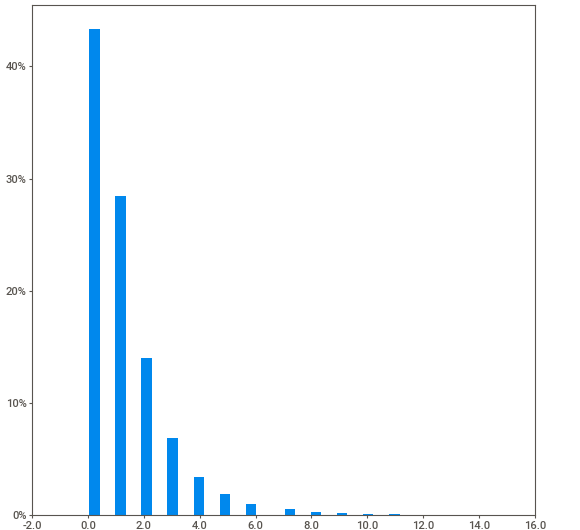
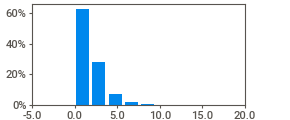
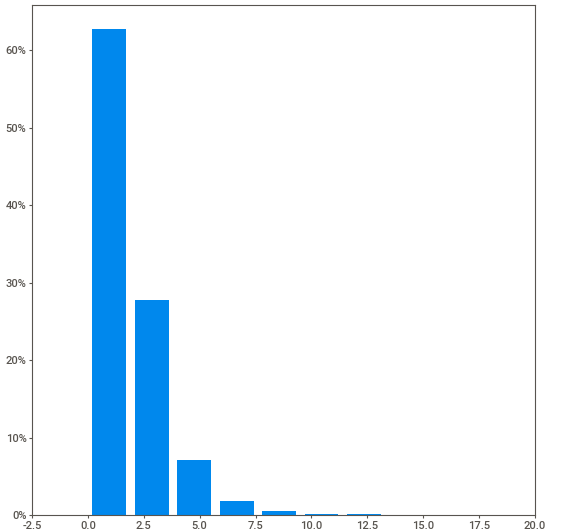
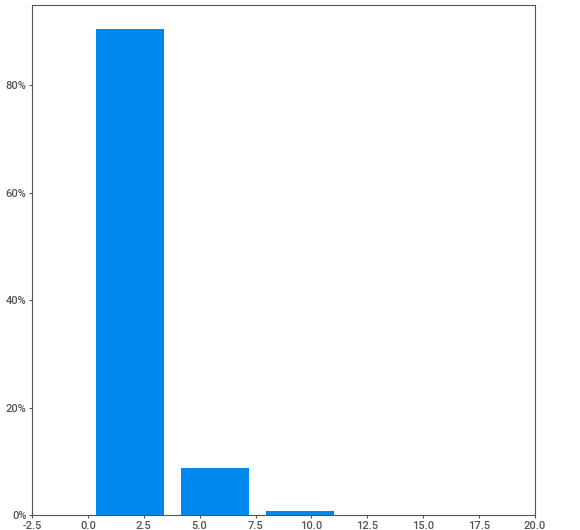
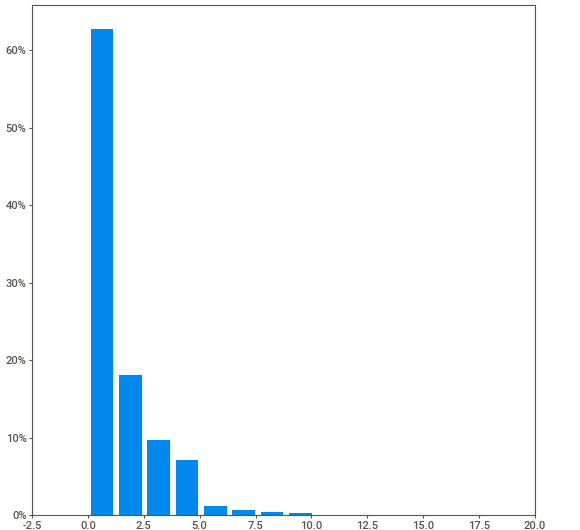
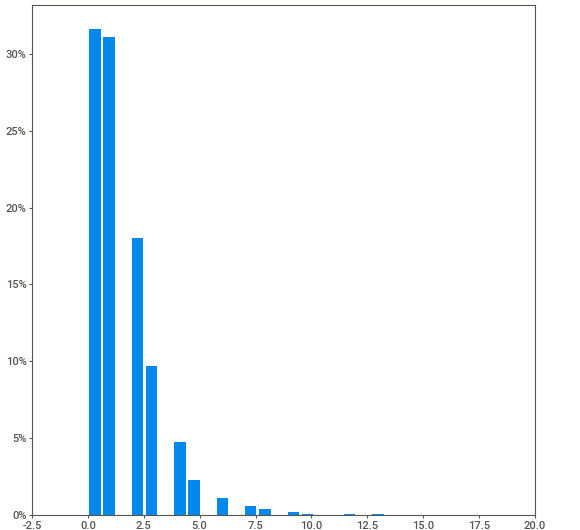
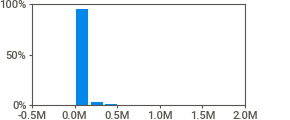
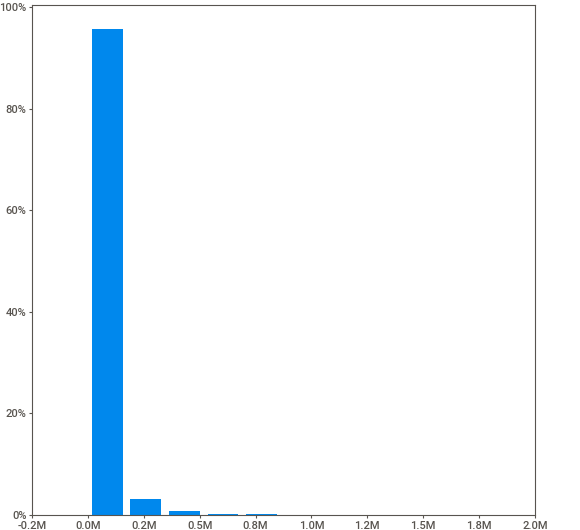
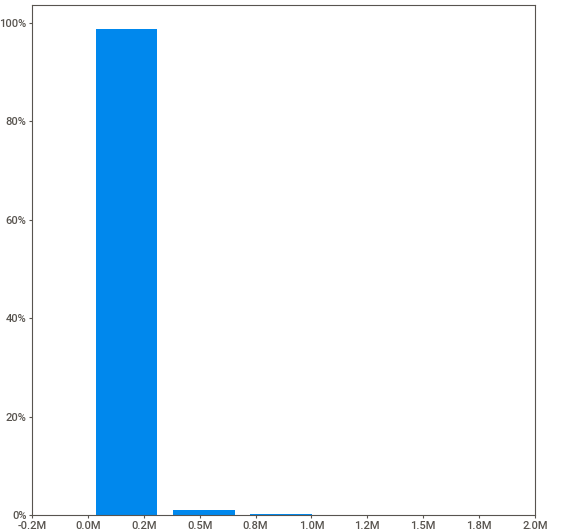
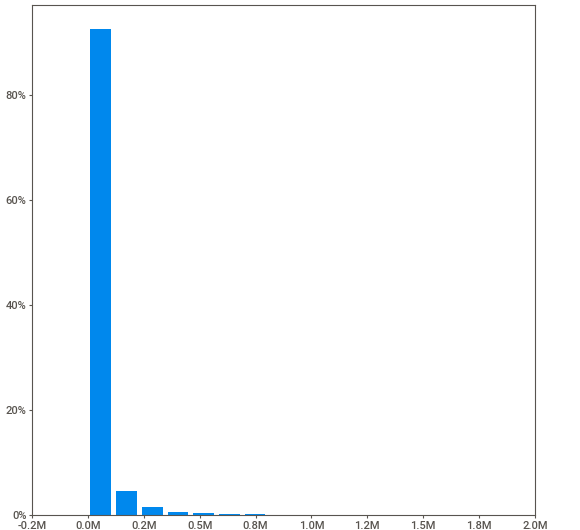
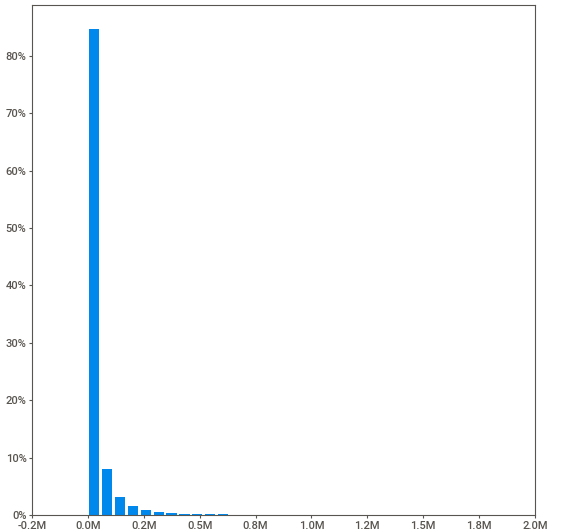
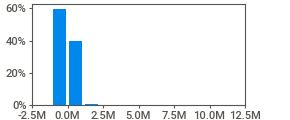
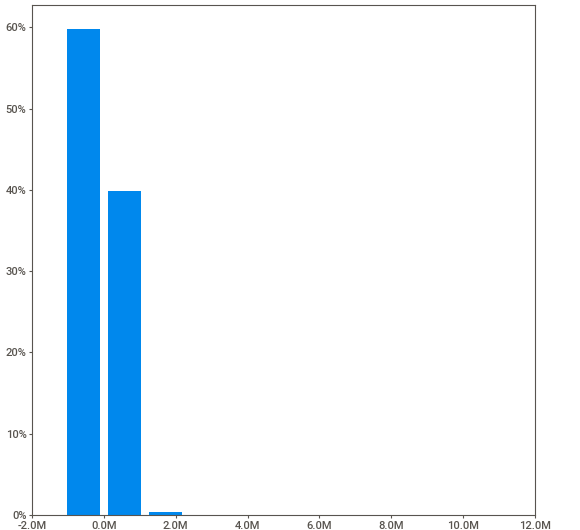
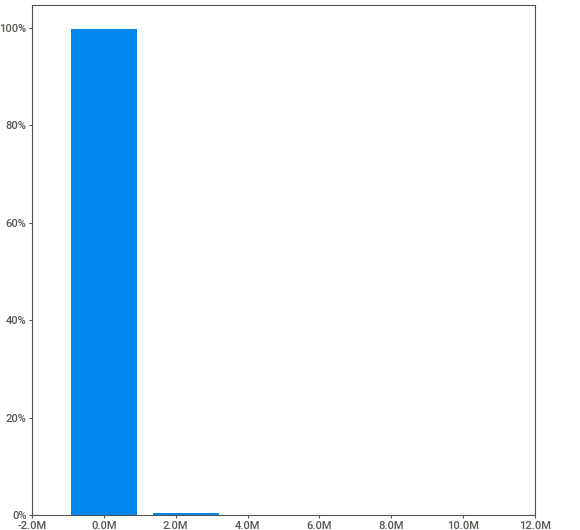
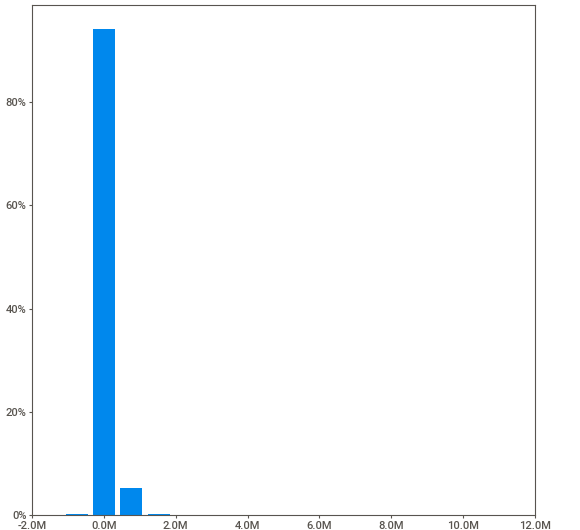
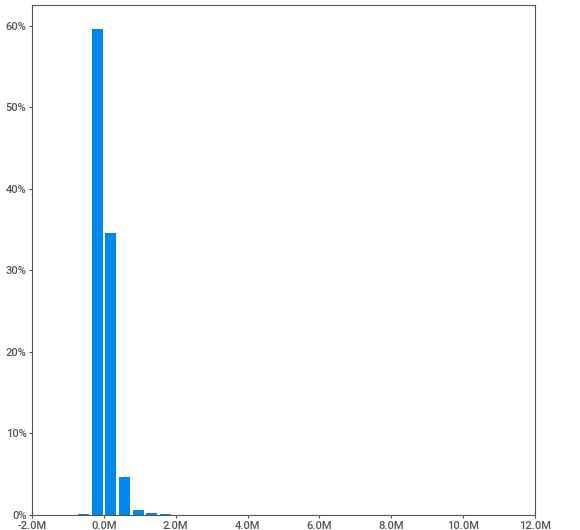
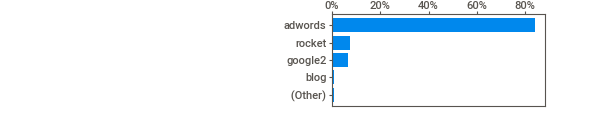
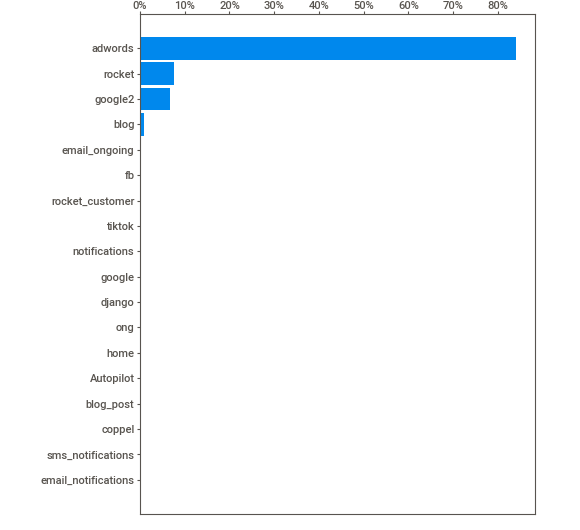
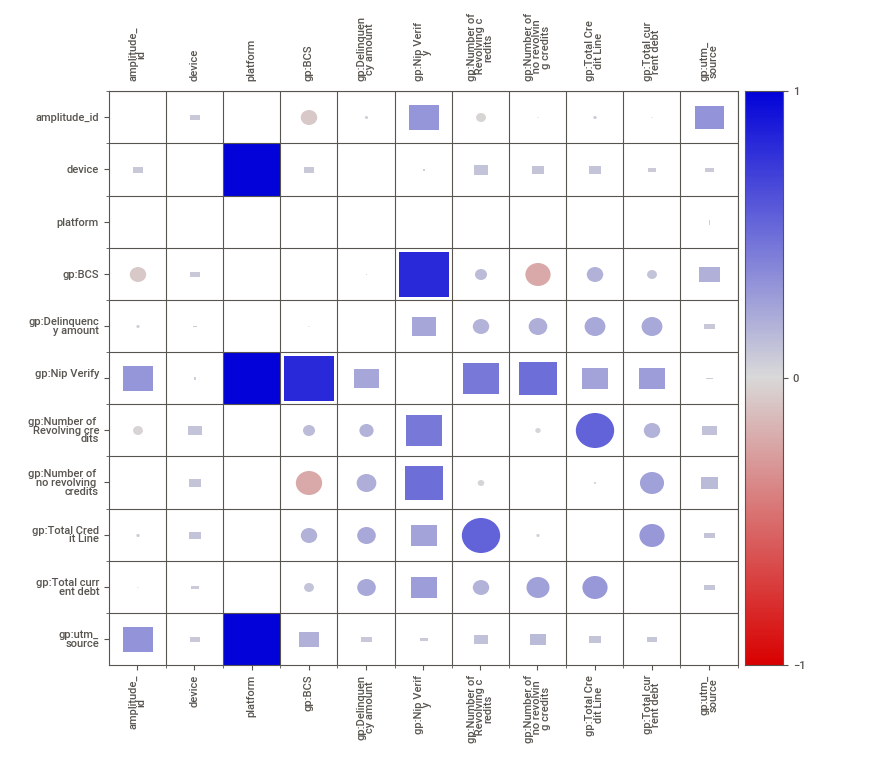
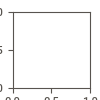

In [ ]:
report_rocketla.show_notebook()

In [ ]:
df_conversion_rate['gp:Nip Verify'].count()

11343

In [ ]:
px.funnel(y = ['Enter the Site', 'Start Process', 'Finish Process'],
               x= [df_conversion_rate.amplitude_id.count(),df_conversion_rate.user_id.count(), 
                        df_conversion_rate['gp:Nip Verify'].count()], color_discrete_sequence =['#7a4bfb'])
#fig.write_image('/content/drive/MyDrive/Prueba técnica/Rocketla/funnel.png', engine ='kaleido')

In [ ]:
px.funnel(y = ['Enter the Site', 'Start Process', 'Finish Process'],
               x= [(df_conversion_rate.amplitude_id.count()/df_conversion_rate.amplitude_id.count()*100),
                   round((df_conversion_rate.user_id.count()/df_conversion_rate.amplitude_id.count()*100),2), 
                   round((df_conversion_rate['gp:Nip Verify'].count()/df_conversion_rate.amplitude_id.count()*100),2)],
          color_discrete_sequence =['#7a4bfb'])
#plt.savefig('/content/drive/MyDrive/Prueba técnica/Rocketla/funnel%.png')

In [ ]:
px.funnel(df_information_flux, x='Users', y = 'Process', color= 'Preventa', 
          color_discrete_sequence=['#7a4bfb','#A34BFA'])
#plt.savefig('/content/drive/MyDrive/Prueba técnica/Rocketla/informationfunnel.png')

In [ ]:
df_source = pd.read_csv('/content/drive/MyDrive/Prueba técnica/Rocketla/funnel_source.csv')


In [ ]:
df_source.head(3)

,Source,Stage,Count
0,Autopilot,Enter the Site,3
1,adwords,Enter the Site,22725
2,blog,Enter the Site,244


In [ ]:
df_source.columns

Index(['Source', 'Stage', 'Count'], dtype='object')

In [ ]:
px.funnel(df_source, x ='Count', y = 'Stage', color = 'Source')
#plt.savefig('/content/drive/MyDrive/Prueba técnica/Rocketla/funnel_source.png')

In [13]:
df_conversion_rate.Birthday = pd.to_datetime(df_conversion_rate.Birthday)

In [14]:
from datetime import datetime
date = datetime.now()

In [15]:
df_conversion_rate['Age'] = date.year - df_conversion_rate.Birthday.dt.strftime('%Y').astype(float)

In [ ]:
df_conversion_rate.to_csv('/content/drive/MyDrive/Prueba técnica/Base_Conversion_worked.csv',index = False)

In [16]:
df_converted = df_conversion_rate[df_conversion_rate['gp:Nip Verify'].isnull() == False].copy()

In [ ]:
df_converted.head(3)

,amplitude_id,user_id,city,device,os,platform,region,gp:BCS,gp:Birthday,gp:Delinquency amount,gp:Nip Verify,gp:Number of Revolving credits,gp:Number of no revolving credits,gp:Total Credit Line,gp:Total current debt,gp:utm_source
1,4.116090e+11,83a19c9c-6122-4fc2-ae05-b99d6a33a4be,Naucalpan,Android,Chrome Mobile 102,Web,México,657.0,1991-12-11,0.0,VERDADERO,0.0,0.0,NaN,0.0,adwords
3,4.090560e+11,75f7d42d-19f2-40f2-8dde-fb1715563eb6,Zamora,Android,Chrome Mobile 102,Web,Michoacán,541.0,1996-01-04,15362.0,VERDADERO,0.0,1.0,NaN,0.0,adwords
5,4.114460e+11,aee1b964-238a-4740-8a85-14f0c6eac00b,NaN,Android,Chrome Mobile 96,Web,Nuevo León,668.0,1996-09-17,22310.0,VERDADERO,0.0,0.0,NaN,0.0,adwords


In [ ]:
df_converted['gp:Birthday'].count()

10985

In [ ]:
df_age = df_converted[df_converted['gp:Birthday'].isnull() == False]

In [ ]:
df_age['gp:Birthday'] = pd.to_datetime(df_age['gp:Birthday'])

<ipython-input-42-8977dbcbc9ee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



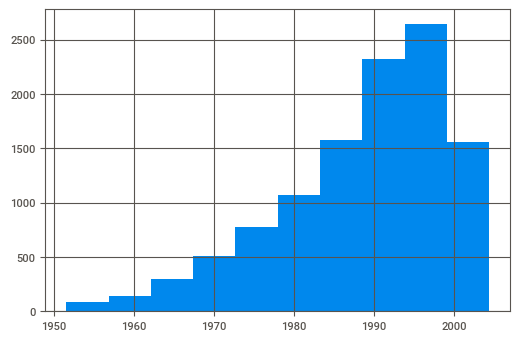

In [ ]:
df_age['gp:Birthday'].hist()

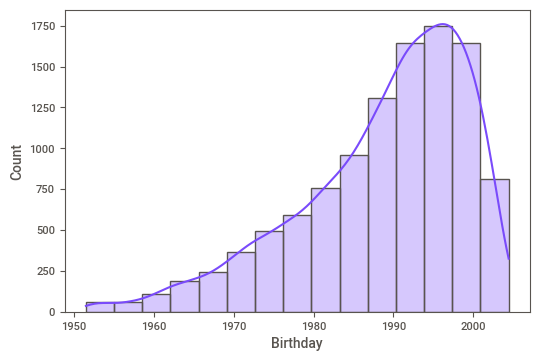

In [ ]:
sns.histplot(df_age, x = 'Birthday', color= '#7a4bfb', discrete = False, bins = 15,
             alpha = 0.3,
             kde = True)
plt.savefig('/content/drive/MyDrive/Prueba técnica/histbrithday.png')

In [ ]:
df_age = df_age.rename(columns={'gp:Birthday':'Birthday'})

In [ ]:
date.year-df_age.Birthday[1].year

32

In [ ]:
df_age['Age'] = date.year - df_age.Birthday.dt.strftime('%Y').astype(int)

In [ ]:
df_age.Age

1        32
3        27
5        27
7        31
9        28
         ..
32128    35
32132    43
32136    27
32137    38
32138    27
Name: Age, Length: 10985, dtype: int64

In [ ]:
df_age.columns

Index(['amplitude_id', 'user_id', 'city', 'device', 'os', 'platform', 'region',
       'gp:BCS', 'Birthday', 'gp:Delinquency amount', 'gp:Nip Verify',
       'gp:Number of Revolving credits', 'gp:Number of no revolving credits',
       'gp:Total Credit Line', 'gp:Total current debt', 'gp:utm_source',
       'Age'],
      dtype='object')

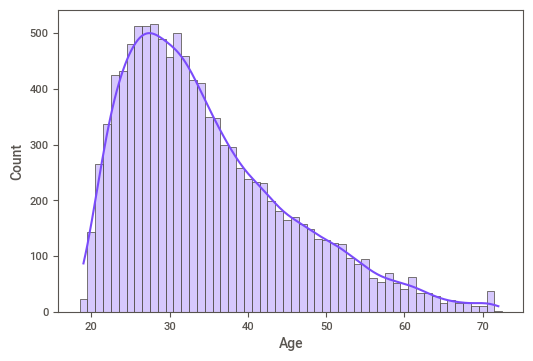

In [ ]:
sns.histplot(df_age, x = 'Age', color= '#7a4bfb', discrete = True, alpha = 0.3,
             kde = True)
plt.savefig('/content/drive/MyDrive/Prueba técnica/histage.png')

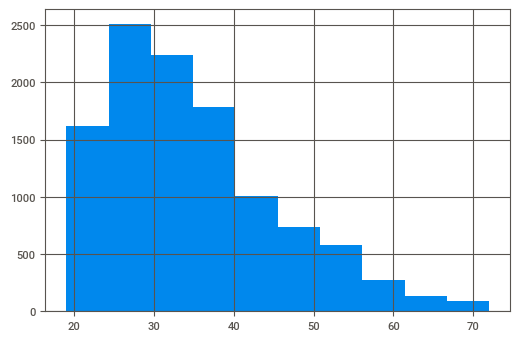

In [ ]:
df_age['Age'].hist()

In [ ]:
df_converted.columns

Index(['amplitude_id', 'user_id', 'city', 'device', 'os', 'platform', 'region',
       'gp:BCS', 'gp:Birthday', 'gp:Delinquency amount', 'gp:Nip Verify',
       'gp:Number of Revolving credits', 'gp:Number of no revolving credits',
       'gp:Total Credit Line', 'gp:Total current debt', 'gp:utm_source'],
      dtype='object')

In [17]:
df_converted.to_csv('/content/drive/MyDrive/Prueba técnica/Rocketla/converted.csv', index= False)

In [18]:
df_converted = pd.read_csv('/content/drive/MyDrive/Prueba técnica/Rocketla/converted.csv')

In [20]:
df_ideal_customer = df_converted[(df_converted['gp:Number of Revolving credits']>= 1)&(df_converted['gp:Delinquency amount'] == 0)&(df_converted['Birthday'].isnull() == False)].copy()

In [21]:
df_ideal_customer.columns

Index(['amplitude_id', 'user_id', 'city', 'device', 'os', 'platform', 'region',
       'gp:BCS', 'Birthday', 'gp:Delinquency amount', 'gp:Nip Verify',
       'gp:Number of Revolving credits', 'gp:Number of no revolving credits',
       'gp:Total Credit Line', 'gp:Total current debt', 'gp:utm_source',
       'Age'],
      dtype='object')

In [6]:
colors = ['#7A4BFA','#DC33FF','#9539E3','#393AE3','#393AE3','#3F9CFD','#3D51E6']

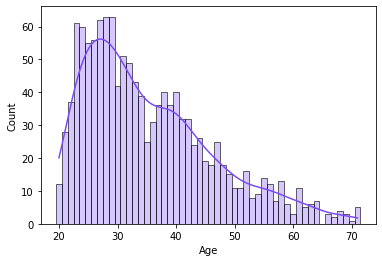

In [23]:
sns.histplot(df_ideal_customer, x = 'Age', color= '#7a4bfb', discrete = True, alpha = 0.3,
             kde = True)
plt.savefig('/content/drive/MyDrive/Prueba técnica/hist_age_ideal.png')

In [24]:
df_ideal_customer['gp:BCS'].mean()

666.0007722007722

In [130]:
df_ideal_customer['gp:BCS'].median()

665.0

In [25]:
df_ideal_customer['gp:Total current debt'].mean()

99072.8694980695

In [100]:
df_ideal_customer['gp:Total current debt'].median()

15467.0

In [44]:
df_ideal_customer.columns

Index(['amplitude_id', 'user_id', 'city', 'device', 'os', 'platform', 'region',
       'gp:BCS', 'Birthday', 'gp:Delinquency amount', 'gp:Nip Verify',
       'gp:Number of Revolving credits', 'gp:Number of no revolving credits',
       'gp:Total Credit Line', 'gp:Total current debt', 'gp:utm_source',
       'Age'],
      dtype='object')

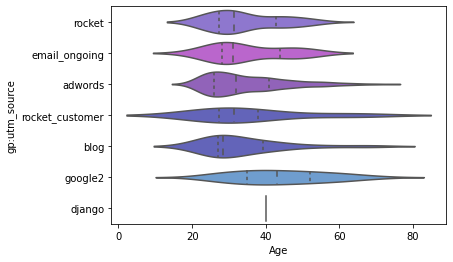

In [56]:
sns.violinplot (data= df_ideal_customer, x = 'Age', y = 'gp:utm_source', inner ='quartile',
                saturation = 0.5, palette = colors)
plt.savefig('/content/drive/MyDrive/Prueba técnica/hist_age_ideal_violin.png')

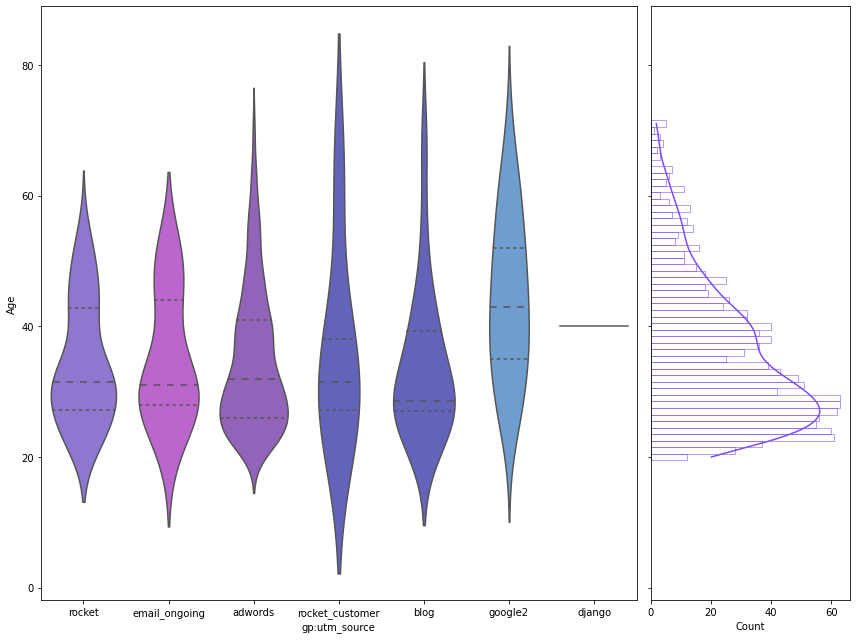

In [99]:
f, axs = plt.subplots(1,2,
                      figsize=(12,9),
                      sharey=True, gridspec_kw=dict(width_ratios=[3,1]))
sns.violinplot (data= df_ideal_customer, y = 'Age', x = 'gp:utm_source', inner ='quartile',
                saturation = 0.5, palette = colors, ax= axs[0])
sns.histplot(df_ideal_customer, y = 'Age', color= '#7a4bfb', legend = False, kde = True, discrete = True,
             fill = False,cbar_kws = {'drawedges':False}, ax= axs[1])
f.tight_layout()
plt.savefig('/content/drive/MyDrive/Prueba técnica/hist_age_ideal_complete.png')

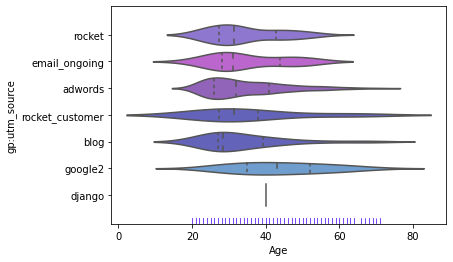

In [101]:
sns.violinplot(data= df_ideal_customer, x = 'Age', y = 'gp:utm_source', inner ='quartile',
                saturation = 0.5, palette = colors)
sns.rugplot(data= df_ideal_customer, x = 'Age',color= '#7a4bfb')
plt.savefig('/content/drive/MyDrive/Prueba técnica/hist_age_ideal_rugplot.png')

In [55]:
df_ideal_customer.to_csv('/content/drive/MyDrive/Prueba técnica/ideal.csv',index=False)

In [ ]:
df_conversion_rate.columns

Index(['amplitude_id', 'user_id', 'city', 'device', 'os', 'platform', 'region',
       'gp:BCS', 'gp:Birthday', 'gp:Delinquency amount', 'gp:Nip Verify',
       'gp:Number of Revolving credits', 'gp:Number of no revolving credits',
       'gp:Total Credit Line', 'gp:Total current debt', 'gp:utm_source'],
      dtype='object')

In [ ]:
df_conversion_rate.groupby('gp:utm_source').agg({'amplitude_id':'count','user_id':'count','gp:Nip Verify':'count'}).T

gp:utm_source,Autopilot,adwords,blog,blog_post,coppel,django,email_notifications,email_ongoing,fb,google,google2,home,notifications,ong,rocket,rocket_customer,sms_notifications,tiktok
amplitude_id,3,22725,244,2,2,6,1,87,46,7,1807,5,9,6,2047,23,2,10
user_id,2,12100,178,2,2,6,1,84,31,3,883,2,8,6,592,22,2,2
gp:Nip Verify,2,8949,156,2,2,6,1,78,6,1,471,2,6,6,388,22,2,1


In [ ]:
df_source= df_conversion_rate.groupby('gp:utm_source').agg({'amplitude_id':'count','user_id':'count','gp:Nip Verify':'count'}).T.copy()

In [ ]:
df_source['total'] = df_source['amplitude_id']+df_source['user_id']+df_source['gp:Nip Verify'] 

In [ ]:
df_source

gp:utm_source,Autopilot,adwords,blog,blog_post,coppel,django,email_notifications,email_ongoing,fb,google,google2,home,notifications,ong,rocket,rocket_customer,sms_notifications,tiktok
amplitude_id,3,22725,244,2,2,6,1,87,46,7,1807,5,9,6,2047,23,2,10
user_id,2,12100,178,2,2,6,1,84,31,3,883,2,8,6,592,22,2,2
gp:Nip Verify,2,8949,156,2,2,6,1,78,6,1,471,2,6,6,388,22,2,1


In [ ]:
df_source.reset_index(inplace = True)

In [ ]:
df_source.columns

Index(['index', 'Autopilot', 'adwords', 'blog', 'blog_post', 'coppel',
       'django', 'email_notifications', 'email_ongoing', 'fb', 'google',
       'google2', 'home', 'notifications', 'ong', 'rocket', 'rocket_customer',
       'sms_notifications', 'tiktok'],
      dtype='object', name='gp:utm_source')

In [ ]:
df_source =df_source.rename(columns={'index':'source'})

In [ ]:
df_source.to_csv('/content/drive/MyDrive/Prueba técnica/source.csv',index = False)

In [ ]:
px.funnel(df_source, x= 'adwords', y = 'index')

In [ ]:
df_regions = df_conversion_rate.groupby(['region','os','device']).agg({'amplitude_id':'count'}).reset_index().copy()

In [ ]:
df_regions.columns

Index(['region', 'os', 'device', 'amplitude_id'], dtype='object')

In [ ]:
df_regions.to_csv('/content/drive/MyDrive/Prueba técnica/regions.csv',index = False)

In [119]:
df_ideal_customer.columns

Index(['amplitude_id', 'user_id', 'city', 'device', 'os', 'platform', 'region',
       'gp:BCS', 'Birthday', 'gp:Delinquency amount', 'gp:Nip Verify',
       'gp:Number of Revolving credits', 'gp:Number of no revolving credits',
       'gp:Total Credit Line', 'gp:Total current debt', 'gp:utm_source',
       'Age'],
      dtype='object')

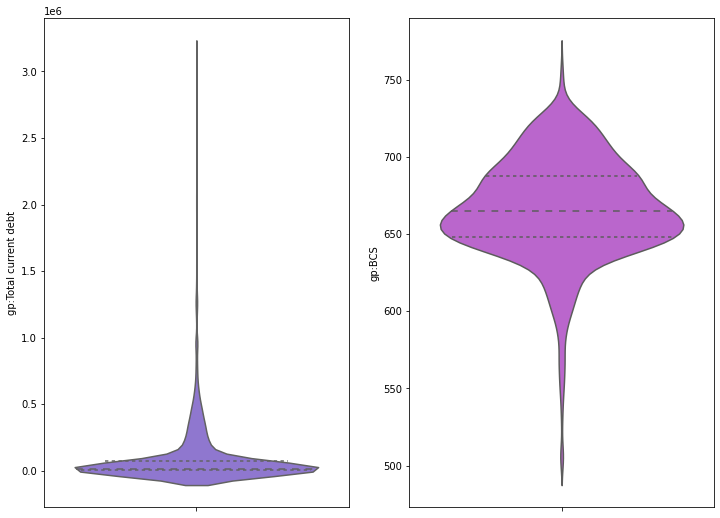

In [129]:
f, axs = plt.subplots(1,2 ,figsize = (12,9))
sns.violinplot(data= df_ideal_customer, y = 'gp:Total current debt',color = '#7a4bfb', saturation = 0.5,
               inner ='quartile',
               ax = axs[0], legend = 'Distribucion de la Deuda de los Usuarios')
sns.violinplot(data= df_ideal_customer, y = 'gp:BCS',color = '#DC33FF', saturation = 0.5,
               inner ='quartile', ax = axs[1], legend = 'Distribucion de los scores de los Usuarios')
plt.savefig('/content/drive/MyDrive/Prueba técnica/dsitributions.png')

In [132]:
%pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
from kmodes.kmodes import KModes

In [139]:
df_kmodes = pd.read_csv('/content/drive/MyDrive/Prueba técnica/Rocketla/Kmodes.csv')

In [140]:
df_kmodes.device.value_counts()

Android            14488
Windows             2134
Apple iPhone        2062
Mac                  137
Linux                 60
Apple iPad            44
Chromium OS           23
sin información        7
KAIOS                  3
Tizen                  1
Name: device, dtype: int64

In [145]:
df_kmodes

,user_id,city,device,os,region,gp:utm_source,Survivor
0,sin información,Reynosa,Android,Chrome Mobile 102,Tamaulipas,adwords,0
1,sin información,Tuxtla Gutiérrez,Android,Chrome Mobile 102,Chiapas,adwords,0
2,32817846-31d7-4875-a2e2-7526274b4219,Mexico City,Android,Chrome Mobile 102,Mexico City,adwords,1
3,sin información,Guadalajara,Android,Chrome Mobile 94,Jalisco,adwords,0
4,f2c8a989-ffa8-4460-a9b2-407d66cc0c3c,Piedras Negras,Windows,Chrome 102,Coahuila,sin información,1
...,...,...,...,...,...,...,...
18954,sin información,Zapopan,Android,Chrome Mobile 102,Jalisco,adwords,0
18955,sin información,Aguascalientes,Android,Chrome Mobile 90,Aguascalientes,adwords,0
18956,sin información,Busan,Windows,Chrome 80,Busan,sin información,0
18957,sin información,Alvaro Obregon,Android,Chrome Mobile 102,Mexico City,adwords,0


In [141]:
kmodes_huang = KModes(n_clusters=5, init='Huang', verbose=1)

In [144]:
cluster_centers = kmodes_huang.fit(df_kmodes)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2986, cost: 46897.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3681, cost: 46738.0
Run 2, iteration: 2/100, moves: 476, cost: 46738.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 973, cost: 44975.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2092, cost: 46615.0
Run 4, iteration: 2/100, moves: 137, cost: 46615.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2512, cost: 45082.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 1008, cost: 45201.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, mo

In [152]:
c = kmodes_huang.predict(df_kmodes)

In [154]:
df_kmodes['Cluster'] = c

In [156]:
df_kmodes.to_csv('/content/drive/MyDrive/Prueba técnica/Rocketla/cluster.csv', index = False)

In [3]:
df_kmodes= pd.read_csv('/content/drive/MyDrive/Prueba técnica/Rocketla/cluster.csv')

In [18]:
df_kmodes.Cluster.value_counts()

1    8125
0    3114
2    2905
4    2665
3    2150
Name: Cluster, dtype: int64

In [21]:
df_kmodes.columns

Index(['user_id', 'city', 'device', 'os', 'region', 'gp:utm_source',
       'Survivor', 'Cluster'],
      dtype='object')

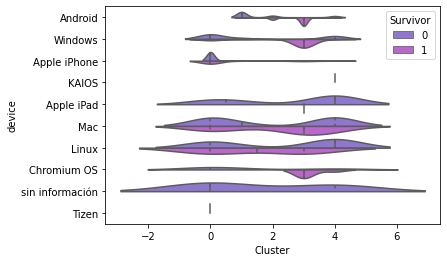

In [26]:
sns.violinplot(data= df_kmodes, y = 'device', x = 'Cluster', hue = 'Survivor', split = True, palette = colors[:2],
               saturation = 0.5,
               inner ='quartile'
              )
plt.savefig('/content/drive/MyDrive/Prueba técnica/cluster_distribution.png')

In [35]:
df_kmodes.columns

Index(['user_id', 'city', 'device', 'os', 'region', 'gp:utm_source',
       'Survivor', 'Cluster'],
      dtype='object')

In [41]:
df_kmodes[df_kmodes.Cluster==3]

,user_id,city,device,os,region,gp:utm_source,Survivor,Cluster
4,f2c8a989-ffa8-4460-a9b2-407d66cc0c3c,Piedras Negras,Windows,Chrome 102,Coahuila,sin información,1,3
16,3be62708-b792-412a-86e4-79990c8c2712,Xalapa,Android,Chrome Mobile 102,Veracruz,adwords,1,3
25,41ba2f2e-6809-4613-bdab-e8d1f68ce298,Zapopan,Android,Chrome Mobile 102,Jalisco,adwords,1,3
29,53e08ced-741a-4cbe-8dc8-3c78f67bd817,Tampico,Windows,Chrome 102,Tamaulipas,adwords,1,3
30,f705cb6b-a475-46f0-a2e0-b9f090f571ed,Monclova,Android,Chrome Mobile 102,Coahuila,sin información,1,3
...,...,...,...,...,...,...,...,...
18916,f28527ae-cf92-4a26-a47f-c7f200d6e186,Monterrey,Android,Chrome Mobile 102,Nuevo León,adwords,1,3
18917,64037f62-ad6d-4924-bc09-c6d5c32ea316,Huimanguillo,Android,Chrome Mobile 102,Tabasco,adwords,1,3
18918,e9316905-1ab9-43d4-b266-150710f372e6,Zamora,Windows,Edge 101,Michoacán,adwords,1,3
18920,b56acf29-64bf-48f0-a9ca-4af20a5354e3,Ciudad Nicolás Romero,Android,Chrome Mobile 102,México,adwords,1,3


In [42]:
print(df_kmodes[df_kmodes.Cluster==3].city.value_counts())

Guadalajara          150
Monterrey             89
Tijuana               72
sin información       65
Ecatepec              53
                    ... 
Valladolid             1
Ciudad Altamirano      1
Teotihuacan            1
Pueblo Nuevo           1
Torreon [Granja]       1
Name: city, Length: 267, dtype: int64


In [37]:
df_kmodes[df_kmodes.Cluster==3].device.value_counts()

Android         1873
Windows          229
Apple iPhone      31
Mac                9
Chromium OS        4
Linux              3
Apple iPad         1
Name: device, dtype: int64

In [38]:
df_kmodes[df_kmodes.Cluster==3]['gp:utm_source'].value_counts()

adwords              1416
google2               313
sin información       238
rocket                118
blog                   32
fb                     17
notifications           5
email_ongoing           4
sms_notifications       2
tiktok                  1
rocket_customer         1
blog_post               1
Autopilot               1
ong                     1
Name: gp:utm_source, dtype: int64